In [77]:
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yaml
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [87]:
with open('batsmandatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    batsmandatabase = unpickler.load() 
    file.close()
with open('bowlerdatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    bowlerdatabase = unpickler.load() 
    file.close()
    
with open('playerVplayer__2016_2020.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    playerVplayer = unpickler.load() 
    file.close()

In [213]:
for batsman in list(batsmandatabase.keys()):
    if 'Rahman' in batsman:
        print(batsman)

Mujeeb Ur Rahman
Mustafizur Rahman


In [88]:
batsmandatabase['KL Rahul']['bat']

[{'matchId': '598017.yaml',
  'matchDate': datetime.datetime(2013, 4, 16, 0, 0),
  'team': 'Royal Challengers Bangalore',
  'ballsfaced': 12,
  'dots': 7,
  'ballbyball': {118: [{'bowler': 'A Nehra',
     'thisballbatsmanrun': 0,
     'inningstotal': 1,
     'fours': 0,
     'sixes': 0,
     'ifWide': 'No',
     'out': 'no'}],
   117: [{'bowler': 'A Nehra',
     'thisballbatsmanrun': 0,
     'inningstotal': 1,
     'fours': 0,
     'sixes': 0,
     'ifWide': 'No',
     'out': 'no'}],
   116: [{'bowler': 'A Nehra',
     'thisballbatsmanrun': 0,
     'inningstotal': 1,
     'fours': 0,
     'sixes': 0,
     'ifWide': 'No',
     'out': 'no'}],
   115: [{'bowler': 'A Nehra',
     'thisballbatsmanrun': 0,
     'inningstotal': 1,
     'fours': 0,
     'sixes': 0,
     'ifWide': 'No',
     'out': 'no'}],
   114: [{'bowler': 'A Nehra',
     'thisballbatsmanrun': 1,
     'inningstotal': 2,
     'fours': 0,
     'sixes': 0,
     'ifWide': 'No',
     'out': 'no'}],
   113: [{'bowler': 'M Morkel',

In [179]:
batsmanlistinfirstsixovers=['N Rana','Shubman Gill','RA Tripathi','RG Sharma','CA Lynn','SA Yadav']
CareerStrikeRate=[]
CareerBallsPerBoundaries=[]

batsmannameInFirstSixOvers=[]
batsmanballsperboundaries=[]
batsmaninnings=[]
batsmandismissal=[]
batsmanstrikerate=[]
# batsmanfours=[]
# batsmansixes=[]
bastmanout=[]

startdate='2016-01-01'
enddate='2021-01-01'
for batsman in batsmanlistinfirstsixovers:
    matchesplayed=0
    totalCareer=0
    totalCareerFours=0
    totalCareerSixes=0
    totalCareerBalls=0
    totalCareerWicketCount=0
    
    totalRuns=0
    totalBalls=0
    totalfours=0
    totalsixes=0
    
    wicketCount=0
    dismissals=0
    inningsCount=0
    ballsfacedbybatsman=[]
    batsmandismissedballs=[]
    
    for j in batsmandatabase[batsman]['bat']:
        
        if datetime.datetime.strptime(enddate, '%Y-%m-%d')<j['matchDate']\
        or datetime.datetime.strptime(startdate, '%Y-%m-%d')>j['matchDate']:
            continue
            
        matchesplayed+=1
        
        for x in list(j['ballbyball'].keys()):
            for y in j['ballbyball'][x]:
                totalCareer+=y['thisballbatsmanrun']
                totalCareerFours+=y['fours']
                totalCareerSixes+=y['sixes']
                if y['ifWide']=='No':
                    totalCareerBalls+=1
        if y['out']!='no':
            totalCareerWicketCount+=1
#         print(j['run'],y['out'],j['matchId'])

        #--------------for phase-wise calculation----------------------------------
        countThisInnings=False
        for l in list(j['ballbyball'].keys()):
            if l <=119 and l>=84 :
                countThisInnings=True
                break
    
        if countThisInnings:
            inningsCount+=1


            for m in range(l,83,-1):
                if m in list(j['ballbyball'].keys()):

                    for k in j['ballbyball'][m]:
                        if k['ifWide']=='No':
                            totalBalls+=1
                        totalRuns+=k['thisballbatsmanrun']
                        totalfours+=k['fours']
                        totalsixes+=k['sixes']

                        if k['out']!='no':
                            wicketCount+=1


    if wicketCount!=0:               
        Avg=round(((totalRuns)/(wicketCount)),2)
    else:
        Avg='NA'

    totalBoundaries= totalfours+totalsixes   
    if totalBalls!=0:
        Strkrate=round((((totalRuns)/(totalBalls))*100),2)
    else:
        Strkrate='NA'
    if inningsCount!=0:
        foursperinnings=round(((totalfours)/(inningsCount)),2)
        sixesperinnings=round(((totalsixes)/(inningsCount)),2)
        runsperinnings=round(((totalRuns)/(inningsCount)),2)
        ballsperinnings=round(((totalBalls)/(inningsCount)),2)
    else:
        foursperinnings='NA'
        sixesperinnings='NA'
        runsperinnings='NA'
        ballsperinnings='NA'

    if  totalBoundaries!=0:
        boundariesperballs=round(((totalBalls)/(totalBoundaries)),2)
    else:
        boundariesperballs='NA'

                
                
                
    if totalCareerWicketCount!=0:               
        CareerAvg=round(((totalCareer)/(totalCareerWicketCount)),2)
    else:
        CareerAvg='NA'
#     print(batsman,totalRuns,totalCareerWicketCount,CareerAvg)

    if totalCareerBalls!=0:
        batsmanCareerStrkrate=round((((totalCareer)/(totalCareerBalls))*100),2)
    else:
        batsmanCareerStrkrate='NA'     
    CareerStrikeRate.append(batsmanCareerStrkrate)   

    totalCareerBoundaries=totalCareerFours+totalCareerSixes
    if  totalCareerBoundaries!=0:
        Careerboundariesperballs=round(((totalCareerBalls)/(totalCareerBoundaries)),2)
    else:
        Careerboundariesperballs='NA'
    CareerBallsPerBoundaries.append(Careerboundariesperballs)
    
    
    

    #     print(batsmanfoursperinnings,batsmansixesperinnings)     
    batsmannameInFirstSixOvers.append(batsman)
    batsmanballsperboundaries.append(boundariesperballs)
    
    batsmanstrikerate.append(Strkrate)
    
    batsmaninnings.append(inningsCount)
    batsmandismissal.append(wicketCount)
    print(batsman,matchesplayed,inningsCount,totalRuns,totalBalls,totalfours,\
  totalsixes,wicketCount,Avg,Strkrate,foursperinnings,sixesperinnings,runsperinnings,\
      ballsperinnings,boundariesperballs,totalCareerBalls,totalCareer,totalCareerFours,totalCareerSixes,totalCareerWicketCount,CareerAvg,batsmanCareerStrkrate)

            
print(batsmannameInFirstSixOvers,"\n",batsmanstrikerate,"\n",batsmanballsperboundaries,"\n",CareerStrikeRate,"\n",CareerBallsPerBoundaries) 

N Rana 55 40 355 308 43 14 10 35.5 115.26 1.07 0.35 8.88 7.7 5.4 1060 1437 127 72 52 27.63 135.57
Shubman Gill 37 25 382 317 50 7 8 47.75 120.5 2.0 0.28 15.28 12.68 5.56 750 939 87 24 28 33.54 125.2
RA Tripathi 44 30 520 362 63 21 18 28.89 143.65 2.1 0.7 17.33 12.07 4.31 733 988 95 37 39 25.33 134.79
RG Sharma 71 57 768 625 92 28 27 28.44 122.88 1.61 0.49 13.47 10.96 5.21 1431 1845 184 67 63 29.29 128.93
CA Lynn 38 37 749 508 95 36 17 44.06 147.44 2.57 0.97 20.24 13.73 3.88 852 1216 122 60 35 34.74 142.72
SA Yadav 62 37 584 409 86 18 11 53.09 142.79 2.32 0.49 15.78 11.05 3.93 1270 1703 193 45 52 32.75 134.09
['N Rana', 'Shubman Gill', 'RA Tripathi', 'RG Sharma', 'CA Lynn', 'SA Yadav'] 
 [115.26, 120.5, 143.65, 122.88, 147.44, 142.79] 
 [5.4, 5.56, 4.31, 5.21, 3.88, 3.93] 
 [135.57, 125.2, 134.79, 128.93, 142.72, 134.09] 
 [5.33, 6.76, 5.55, 5.7, 4.68, 5.34]


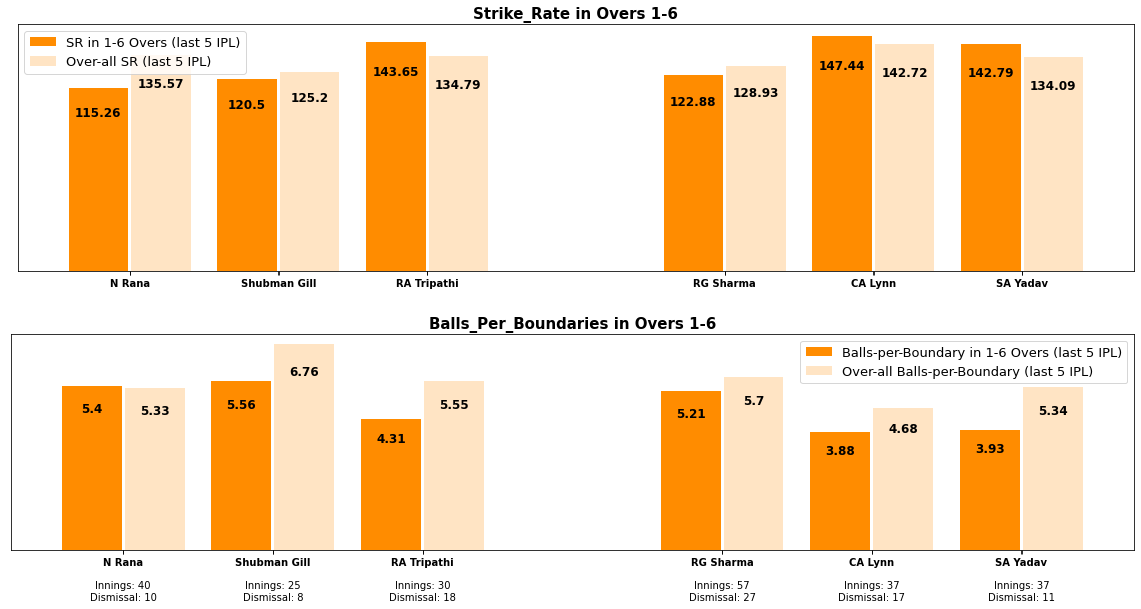

In [181]:
X = np.array([0,1,2,4,5,6])
x=list()
for i in X:
    x.extend([i,i+.001])

width = 0.4
fig=plt.figure(figsize=(20, 10))

ax1 = fig.add_subplot(211)

rects1=ax1.bar(X - (width/2+.01), batsmanstrikerate, color = 'darkorange', width = width, label='SR in 1-6 Overs (last 5 IPL)')
rects2=ax1.bar(X + (width/2+.01), CareerStrikeRate, color = 'bisque', width = width, label='Over-all SR (last 5 IPL)')

ax1.set_xticks(x) #X for dotballs x for SR
xticklabels=[]
for i in range(len(batsmannameInFirstSixOvers)):
    xticklabels.append(batsmannameInFirstSixOvers[i])
    xticklabels.append(' ')
ax1.set_xticklabels(xticklabels,size=10)
    
def autolabel(rects,ax):
    for rect in rects:
        h = rect.get_height()
#         ax.bar(color='red')
        ax.text(rect.get_x()+rect.get_width()/2., 0.9*h, h,
                ha='center', va='top',size=12,rotation=0,weight='bold') #bar-head font-size
autolabel(rects1,ax1)
autolabel(rects2,ax1)
ax1.legend(prop={'size': 13})

for label in ax1.get_xticklabels():
        label.set_weight('bold')

ax1.yaxis.set_visible(False)
ax1.set_title(rects1Label+" in Overs 1-6",weight='bold',size=15)

#------------------------------------------------------------------------------------------------------------------------------------------
ax2 = fig.add_axes([0.12, 0.15, 0.78, 0.3])
rects1=ax2.bar(X - (width/2+.01), batsmanballsperboundaries, color = 'darkorange', width = width, label='Balls-per-Boundary in 1-6 Overs (last 5 IPL)')
rects2=ax2.bar(X + (width/2+.01), CareerBallsPerBoundaries, color = 'bisque', width = width, label='Over-all Balls-per-Boundary (last 5 IPL)')

ax2.set_xticks(x)
xticklabels=[]
for i in range(len(batsmannameInFirstSixOvers)):
    xticklabels.append(batsmannameInFirstSixOvers[i])
    xticklabels.append("\n\nInnings: "+str(batsmaninnings[i])+\
                "\nDismissal: "+str(batsmandismissal[i]))
ax2.set_xticklabels(xticklabels,size=10)
autolabel(rects1,ax2)
autolabel(rects2,ax2)
for label in ax2.get_xticklabels():
    if label.get_text() in batsmannameInFirstSixOvers:
        label.set_weight('bold')
        
ax2.legend(prop={'size': 13})
ax2.yaxis.set_visible(False)
ax2.set_title("Balls_Per_Boundaries in Overs 1-6",weight='bold',size=15)
plt.show()
fig.savefig('batsmanKKR_MI_1_6.png',bbox_inches='tight',pad_inches=0,dpi=500) #change filename

In [78]:
yaml.safe_load(open('ipl/1216531.yaml','r'))

{'meta': {'data_version': 0.9, 'created': '2020-10-15', 'revision': 1},
 'info': {'competition': 'IPL',
  'dates': ['2020-10-15'],
  'gender': 'male',
  'match_type': 'T20',
  'outcome': {'winner': 'Kings XI Punjab', 'by': {'wickets': 8}},
  'overs': 20,
  'player_of_match': ['KL Rahul'],
  'teams': ['Royal Challengers Bangalore', 'Kings XI Punjab'],
  'toss': {'decision': 'bat', 'winner': 'Royal Challengers Bangalore'},
  'umpires': ['KN Ananthapadmanabhan', 'C Shamshuddin'],
  'venue': 'Sharjah Cricket Stadium'},
 'innings': [{'1st innings': {'team': 'Royal Challengers Bangalore',
    'deliveries': [{0.1: {'non_striker': 'D Padikkal',
       'bowler': 'GJ Maxwell',
       'runs': {'extras': 0, 'total': 1, 'batsman': 1},
       'batsman': 'AJ Finch'}},
     {0.2: {'non_striker': 'AJ Finch',
       'bowler': 'GJ Maxwell',
       'runs': {'extras': 0, 'total': 0, 'batsman': 0},
       'batsman': 'D Padikkal'}},
     {0.3: {'non_striker': 'AJ Finch',
       'bowler': 'GJ Maxwell',
      

In [79]:
batsmandatabase['GC Smith']['bat'][3]['ballbyball']

{119: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 118: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 117: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 116: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 115: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 114: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 0,
   'inningstotal': 0,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 108: [{'bowler': 'MS Gony',
   'thisballbatsmanrun': 1,
   'inningstotal': 6,
   'fours': 0,
   'sixes': 0,
   'out': 'no'}],
 107: [{'bowler': 'M Ntini',
   'thisballbatsmanrun': 1,
   'inningstotal': 7,
   'fours': 0,
   'sixes': 0,
  